In [3]:
import numpy as np
import pandas as pd
import altair as alt

import os

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# from csi_extraction import read_log_file, read_csi, calc_frequency, calc_phase_angle

In [117]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

# Visualize CSI HAR experiments

In [212]:
EXPERIMENTS_FOLDER = "../experiments"
experiment_name = "1x1_vs_2x2"
subexperiment_name = "b)22_walking_onside"

# a_walking_in_another_room
# b_walking_in_tx_rx_room
# c_no_walking

exp_filename = "data.csv"

SUBCARRIES_NUM_TWO_HHZ = 56
SUBCARRIES_NUM_FIVE_HHZ = 114

In [164]:
# https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/sys031fp.pdf
# Based on https://github.com/ermongroup/Wifi_Activity_Recognition/.../phase_calibration.m
def calibrate_single_phase(phases):
    phases = np.array(phases)
    difference = 0

    calibrated_phase, calibrated_phase_final = np.zeros_like(phases), np.zeros_like(phases)   
    calibrated_phase[0] = phases[0]
    
    phases_len = phases.shape[0]
    
    for i in range(1, phases_len):
        temp = phases[i]- phases[i - 1]
        
        if abs(temp) > np.pi:
            difference = difference + 1*np.sign(temp)
            
        calibrated_phase[i] = phases[i] - difference * 2 * np.pi
        
    k = (calibrated_phase[-1] - calibrated_phase[0]) / (phases_len - 1)
    b = np.mean(calibrated_phase)
    
    for i in range(phases_len):
        calibrated_phase_final[i] = calibrated_phase[i] - k * i - b
        
    return calibrated_phase_final


def calibrate_phase(phases):
    calibated_phases = np.zeros_like(phases)
    
    for i in range(phases.shape[0]):
#         if len(np.where(phases[i] > 4)) > 0:
#             print("phases[i]: ", phases[i])
#             print("np.unwrap(phases[i]): ", np.unwrap(phases[i]))
        calibated_phases[i] = calibrate_single_phase(np.unwrap(phases[i]))
    
    return calibated_phases

def calibrate_amplitude(amplitudes, rssi): # Basic statistical normalization
    amplitudes = np.array(amplitudes)    
    return ((amplitudes - np.min(amplitudes)) / (np.max(amplitudes) - np.min(amplitudes))) * rssi

In [145]:
def read_csi_data_from_csv(path_to_csv, is_five_hhz=False, antenna_pairs=4):
    data = pd.read_csv(path_to_csv, header=None).values

    if is_five_hhz:
        subcarries_num = SUBCARRIES_NUM_FIVE_HHZ
    else:
        subcarries_num = SUBCARRIES_NUM_TWO_HHZ
    
    data_len = data.shape[0]
    
    amplitudes = data[:, subcarries_num*1:subcarries_num*5]
    phases = data[:, subcarries_num*5:subcarries_num*9]
    
    return amplitudes, phases

# print("path_to_experiment_data: ", path_to_experiment_data)
# read_csi_data_from_csv(path_to_experiment_data)

In [213]:
path_to_experiment_data = os.path.join(EXPERIMENTS_FOLDER, experiment_name, subexperiment_name, exp_filename)

print("path_to_experiment_data: ", path_to_experiment_data)
amplitudes, phases = read_csi_data_from_csv(path_to_experiment_data, True)

path_to_experiment_data:  ../experiments/1x1_vs_2x2/b)22_walking_onside/data.csv


In [131]:
# calibrate_phase(phases[:, 0*SUBCARRIES_NUM_TWO_HHZ:1*SUBCARRIES_NUM_TWO_HHZ])

### Amplitude plot

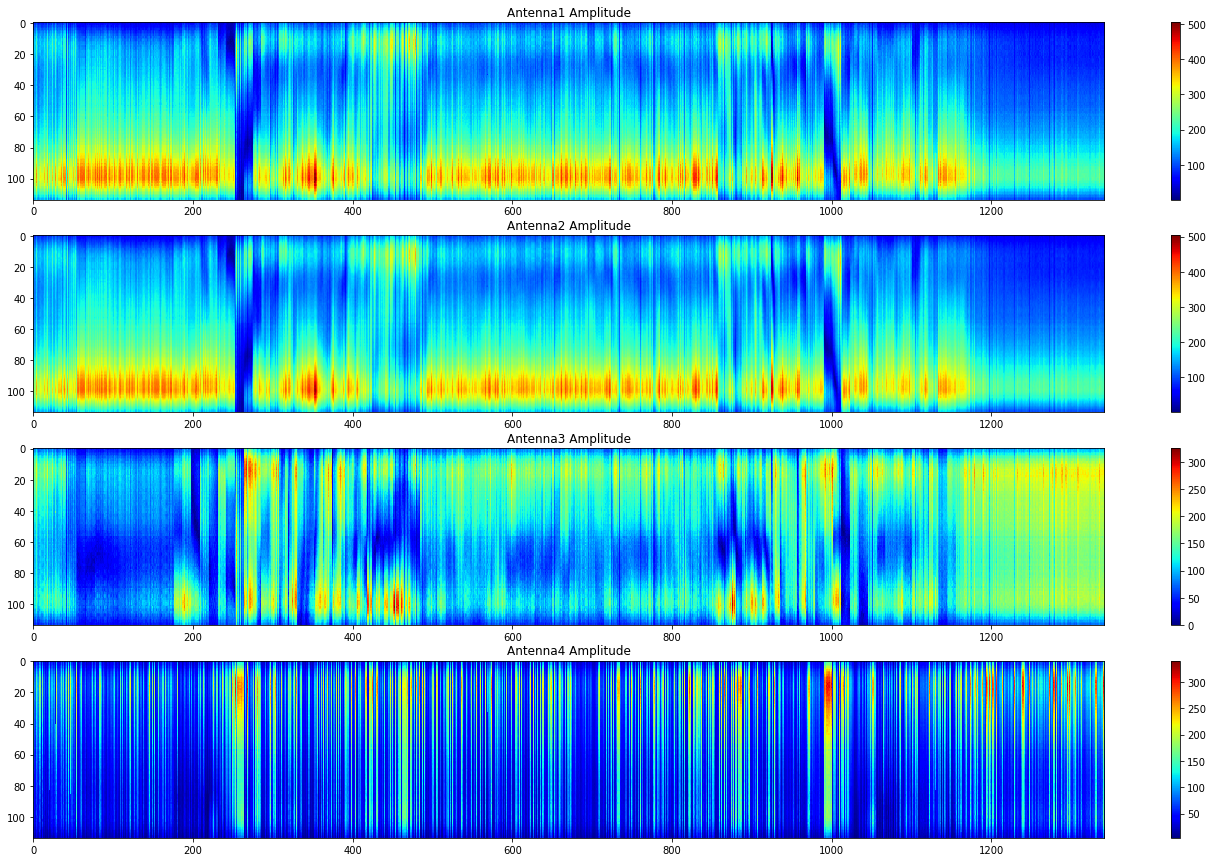

In [222]:
# fig = plt.figure(figsize = (24,10))

# ax1 = plt.subplot(411)
# plt.imshow(amplitudes[:, 0*SUBCARRIES_NUM_TWO_HHZ:1*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax1.set_title("Antenna1 Amplitude")
# plt.colorbar()

# ax2 = plt.subplot(412)
# plt.imshow(amplitudes[:, 1*SUBCARRIES_NUM_TWO_HHZ:2*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax2.set_title("Antenna2 Amplitude")
# plt.colorbar()

# ax3 = plt.subplot(413)
# plt.imshow(amplitudes[:, 2*SUBCARRIES_NUM_TWO_HHZ:3*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax3.set_title("Antenna3 Amplitude")
# plt.colorbar()

# ax4 = plt.subplot(414)
# plt.imshow(amplitudes[:, 3*SUBCARRIES_NUM_TWO_HHZ:4*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax4.set_title("Antenna4 Amplitude")
# plt.colorbar()
# plt.show()

fig = plt.figure(figsize = (24,15))

ax1 = plt.subplot(411)
plt.imshow(amplitudes[:, 0*SUBCARRIES_NUM_FIVE_HHZ:1*SUBCARRIES_NUM_FIVE_HHZ].T, interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Antenna1 Amplitude")
plt.colorbar()

ax2 = plt.subplot(412)
plt.imshow(amplitudes[:, 0*SUBCARRIES_NUM_FIVE_HHZ:1*SUBCARRIES_NUM_FIVE_HHZ].T,interpolation = None, aspect = "auto", cmap="jet")
ax2.set_title("Antenna2 Amplitude")
plt.colorbar()

ax3 = plt.subplot(413)
plt.imshow(amplitudes[:, 2*SUBCARRIES_NUM_FIVE_HHZ:3*SUBCARRIES_NUM_FIVE_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax3.set_title("Antenna3 Amplitude")
plt.colorbar()

ax4 = plt.subplot(414)
plt.imshow(amplitudes[:, 3*SUBCARRIES_NUM_FIVE_HHZ:4*SUBCARRIES_NUM_FIVE_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax4.set_title("Antenna4 Amplitude")
plt.colorbar()
plt.show()


In [ ]:
# ax1 = plt.subplot(611)
# plt.plot(pca_data2[xmin:xmax,0])
# #plt.plot(pca_data2[2500:17500,0])
# ax1.set_title("PCA 1st component")
#
# ax2 = plt.subplot(612)
# plt.plot(pca_data2[xmin:xmax,1])
# #plt.plot(pca_data2[2500:17500,1])
# ax2.set_title("PCA 2nd component")
#
# ax3 = plt.subplot(613)
# plt.plot(pca_data2[xmin:xmax,2])
# #plt.plot(pca_data2[2500:17500,2])
# ax3.set_title("PCA 3rd component")
#
# ax4 = plt.subplot(614)
# plt.plot(pca_data2[xmin:xmax,3])
# #plt.plot(pca_data2[2500:17500,3])
# ax4.set_title("PCA 4th component")
#
# ax5 = plt.subplot(615)
# plt.plot(pca_data2[xmin:xmax,4])
# #plt.plot(pca_data2[2500:17500,4])
# ax5.set_title("PCA 5th component")
#
# ax6 = plt.subplot(616)
# plt.plot(pca_data2[xmin:xmax,5])
# #plt.plot(pca_data2[2500:17500,5])
# ax6.set_title("PCA 6th component")
#
# plt.show()

### Amplitude (normalized) plot

In [124]:
# fig = plt.figure(figsize = (24,10))

# ax1 = plt.subplot(411)
# plt.imshow(calibrate_amplitude(amplitudes[:, 0*SUBCARRIES_NUM_TWO_HHZ:1*SUBCARRIES_NUM_TWO_HHZ], 1).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax1.set_title("Antenna1 Standartized Amplitude")
# plt.colorbar()

# ax2 = plt.subplot(412)
# plt.imshow(calibrate_amplitude(amplitudes[:, 1*SUBCARRIES_NUM_TWO_HHZ:2*SUBCARRIES_NUM_TWO_HHZ], 1).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax2.set_title("Antenna2 Standartized Amplitude")
# plt.colorbar()

# ax3 = plt.subplot(413)
# plt.imshow(calibrate_amplitude(amplitudes[:, 2*SUBCARRIES_NUM_TWO_HHZ:3*SUBCARRIES_NUM_TWO_HHZ], 1).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax3.set_title("Antenna3 Standartized Amplitude")
# plt.colorbar()

# ax4 = plt.subplot(414)
# plt.imshow(calibrate_amplitude(amplitudes[:, 3*SUBCARRIES_NUM_TWO_HHZ:4*SUBCARRIES_NUM_TWO_HHZ], 1).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax4.set_title("Antenna4 Standartized Amplitude")
# plt.colorbar()
# plt.show()


### Phase plot

In [125]:
# fig = plt.figure(figsize = (24,10))

# ax1 = plt.subplot(411)
# plt.imshow(phases[:,0*SUBCARRIES_NUM_TWO_HHZ:1*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax1.set_title("Antenna1 Phase")
# plt.colorbar()

# ax2 = plt.subplot(412)
# plt.imshow(phases[:,1*SUBCARRIES_NUM_TWO_HHZ:2*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax2.set_title("Antenna2 Phase")
# plt.colorbar()

# ax3 = plt.subplot(413)
# plt.imshow(phases[:,2*SUBCARRIES_NUM_TWO_HHZ:3*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax3.set_title("Antenna3 Phase")
# plt.colorbar()

# ax4 = plt.subplot(414)
# plt.imshow(phases[:,3*SUBCARRIES_NUM_TWO_HHZ:4*SUBCARRIES_NUM_TWO_HHZ].T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax4.set_title("Antenna4 Phase")
# plt.colorbar()
# plt.show()


### Phase (calibrated) plot

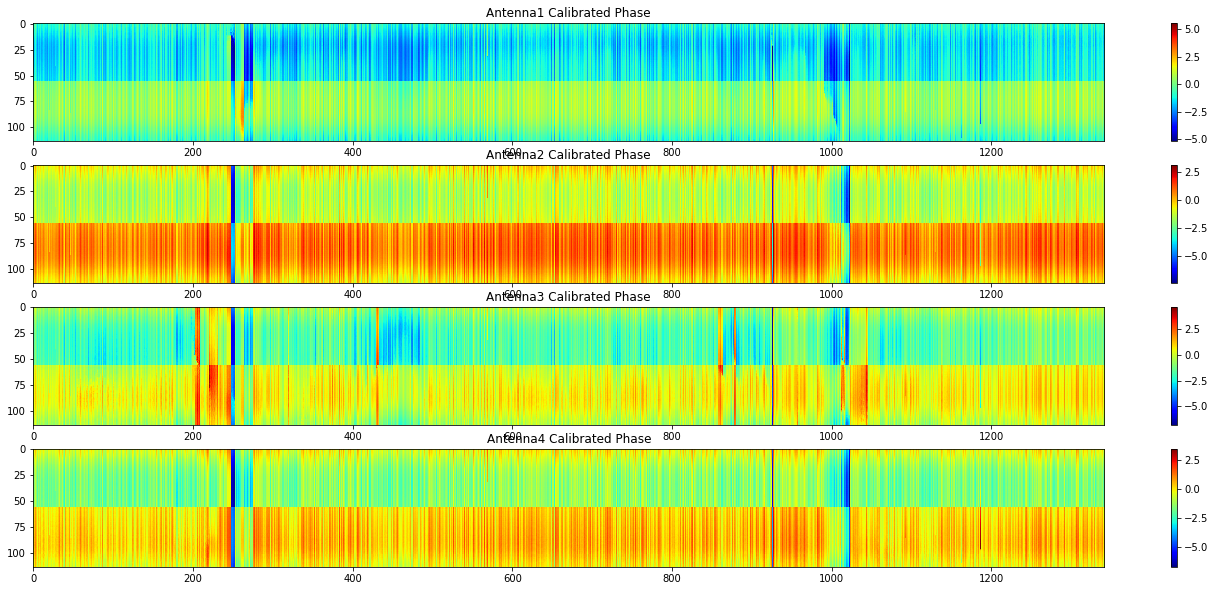

In [215]:
# fig = plt.figure(figsize = (24,10))

# ax1 = plt.subplot(411)
# plt.imshow(calibrate_phase(phases[:,0*SUBCARRIES_NUM_TWO_HHZ:1*SUBCARRIES_NUM_TWO_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax1.set_title("Antenna1 Calibrated Phase")
# plt.colorbar()

# ax2 = plt.subplot(412)
# plt.imshow(calibrate_phase(phases[:,1*SUBCARRIES_NUM_TWO_HHZ:2*SUBCARRIES_NUM_TWO_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax2.set_title("Antenna2 Calibrated Phase")
# plt.colorbar()

# ax3 = plt.subplot(413)
# plt.imshow(calibrate_phase(phases[:,2*SUBCARRIES_NUM_TWO_HHZ:3*SUBCARRIES_NUM_TWO_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax3.set_title("Antenna3 Calibrated Phase")
# plt.colorbar()

# ax4 = plt.subplot(414)
# plt.imshow(calibrate_phase(phases[:,3*SUBCARRIES_NUM_TWO_HHZ:4*SUBCARRIES_NUM_TWO_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
# ax4.set_title("Antenna4 Calibrated Phase")
# plt.colorbar()
# plt.show()


fig = plt.figure(figsize = (24,10))

ax1 = plt.subplot(411)
plt.imshow(calibrate_phase(phases[:,0*SUBCARRIES_NUM_FIVE_HHZ:1*SUBCARRIES_NUM_FIVE_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Antenna1 Calibrated Phase")
plt.colorbar()

ax2 = plt.subplot(412)
plt.imshow(calibrate_phase(phases[:,1*SUBCARRIES_NUM_FIVE_HHZ:2*SUBCARRIES_NUM_FIVE_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Antenna2 Calibrated Phase")
plt.colorbar() 

ax3 = plt.subplot(413)
plt.imshow(calibrate_phase(phases[:,2*SUBCARRIES_NUM_FIVE_HHZ:3*SUBCARRIES_NUM_FIVE_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax3.set_title("Antenna3 Calibrated Phase")
plt.colorbar()

ax4 = plt.subplot(414)
plt.imshow(calibrate_phase(phases[:,3*SUBCARRIES_NUM_FIVE_HHZ:4*SUBCARRIES_NUM_FIVE_HHZ]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax4.set_title("Antenna4 Calibrated Phase")
plt.colorbar()
plt.show()
